# Diabetes Prediction

In [1]:
#Importing the necessary python libraries
import numpy as np
import pandas as pd

In [4]:
#Creating the data
df = pd.read_csv('/content/diabetes (1).csv')

In [5]:
#Reading the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
print(df.shape)

(768, 9)


# EDA And Statistical Analysis

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:
#Checking if there are any special characters in place of values
for i in df.columns:
    print({i:df[i].unique()})

{'Pregnancies': array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])}
{'Glucose': array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])}
{'BloodPressure': array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,

No missing values or any unique values available in the data but, there are some values which are termed as zero(0).  
So,we will consider these zero values as missing values.  
It is better to replace zeros with NaN since after that counting them would be easier and zeros need to be replaced with some suitable values.


In [12]:
df1[['Glucose','BloodPressure',
                    'SkinThickness','Insulin','BMI']] = df1[['Glucose','BloodPressure','SkinThickness',
                                                                            'Insulin','BMI']].replace(0,np.NaN)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


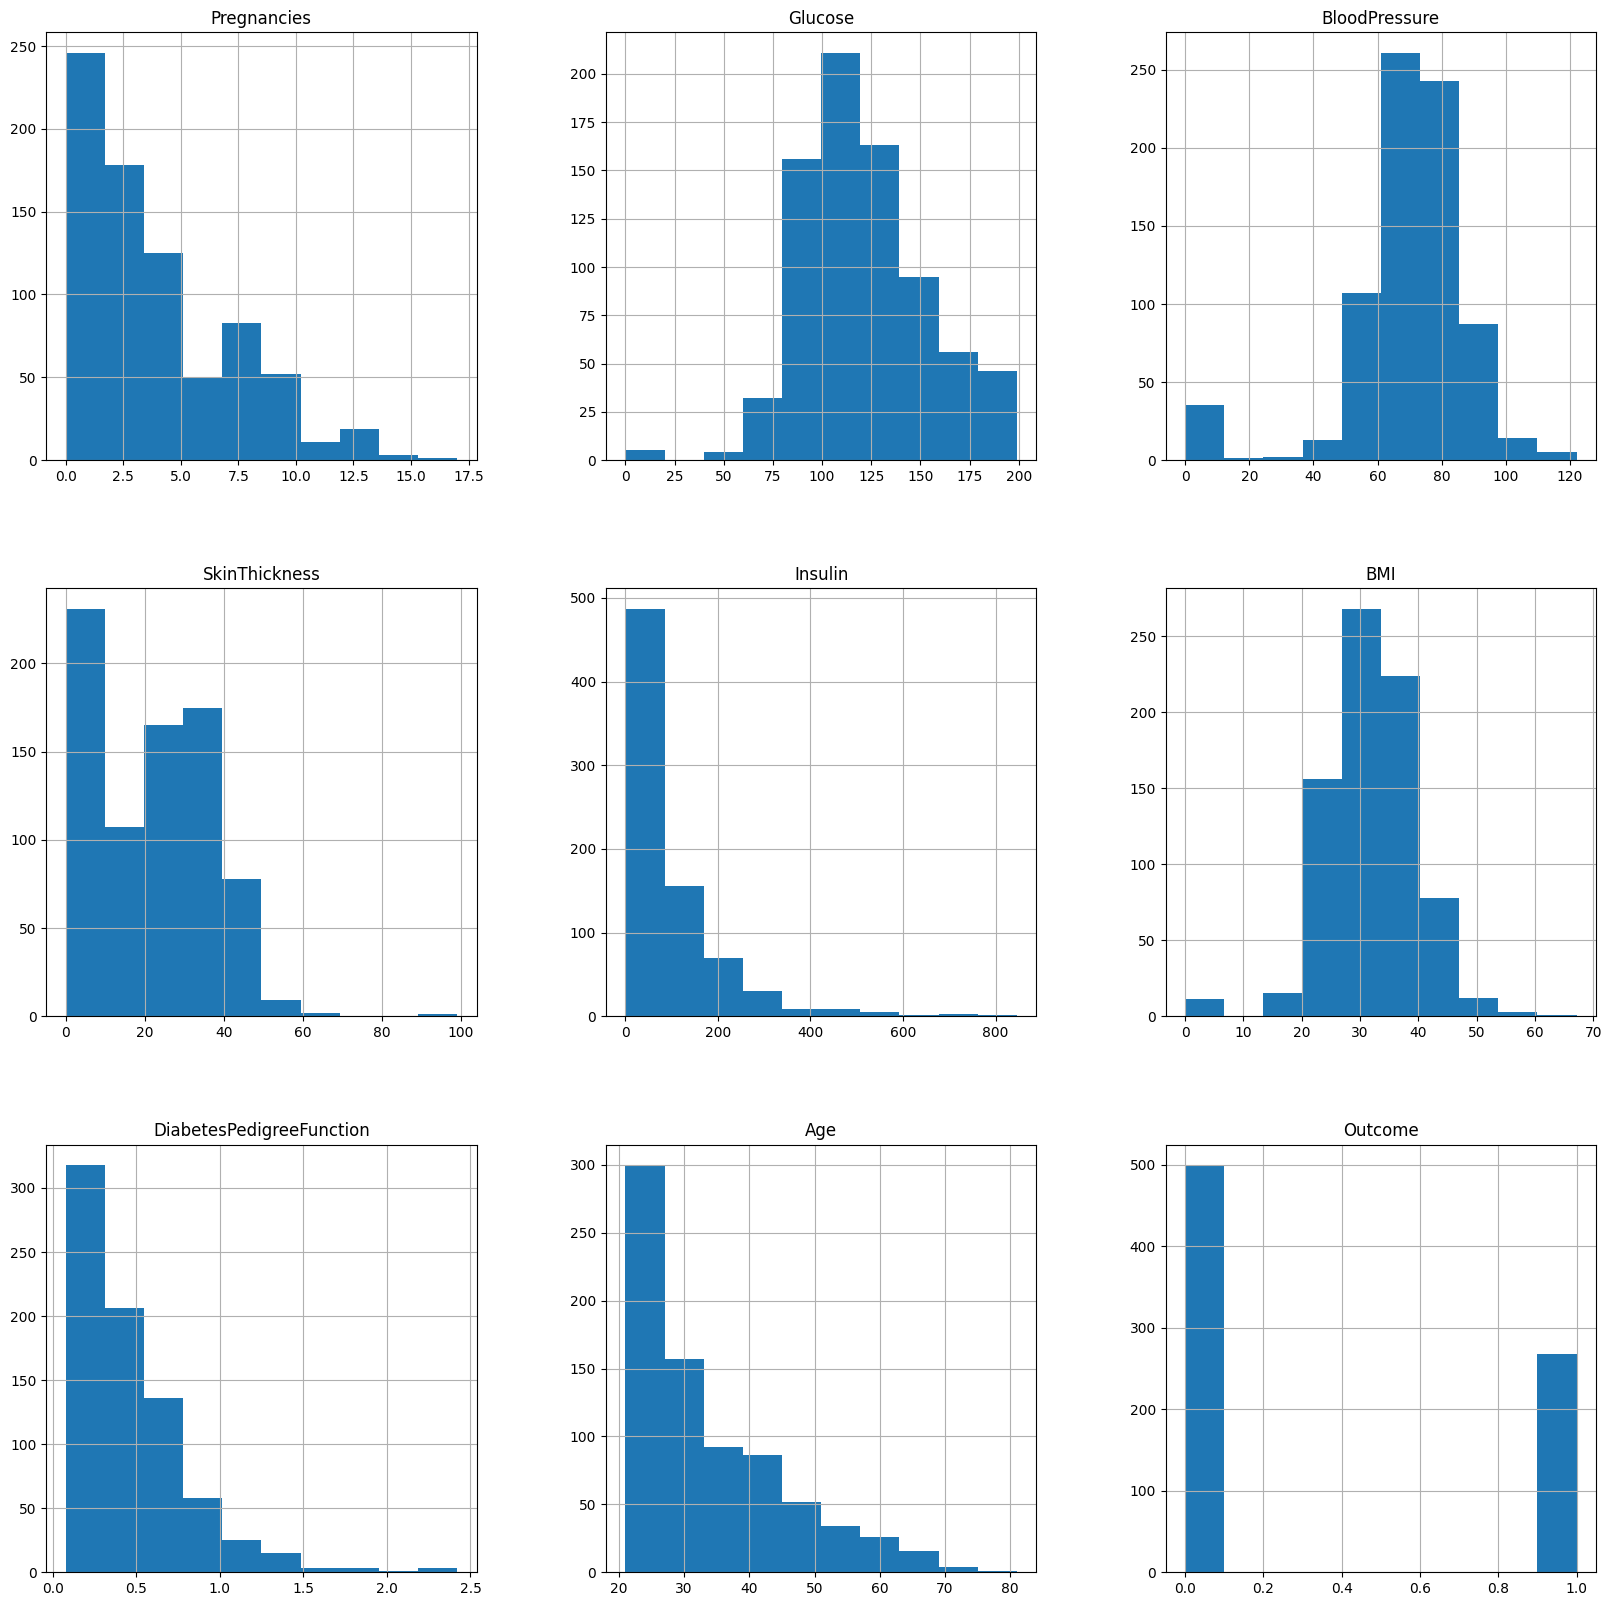

In [14]:
#To fill up these NaN values understanding the data distribution is necessary
x = df.hist(figsize = (20,20))

In [16]:
#Imputing NaN values
df1['Glucose'].fillna(df1['Glucose'].mean(), inplace = True)

df1['BloodPressure'].fillna(df1['BloodPressure'].mean(), inplace = True)

df1['SkinThickness'].fillna(df1['SkinThickness'].median(), inplace = True)

df1['Insulin'].fillna(df1['Insulin'].median(), inplace = True)

df1['BMI'].fillna(df1['BMI'].median(), inplace = True)

In [18]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Plotting after removal removal of NaN values.

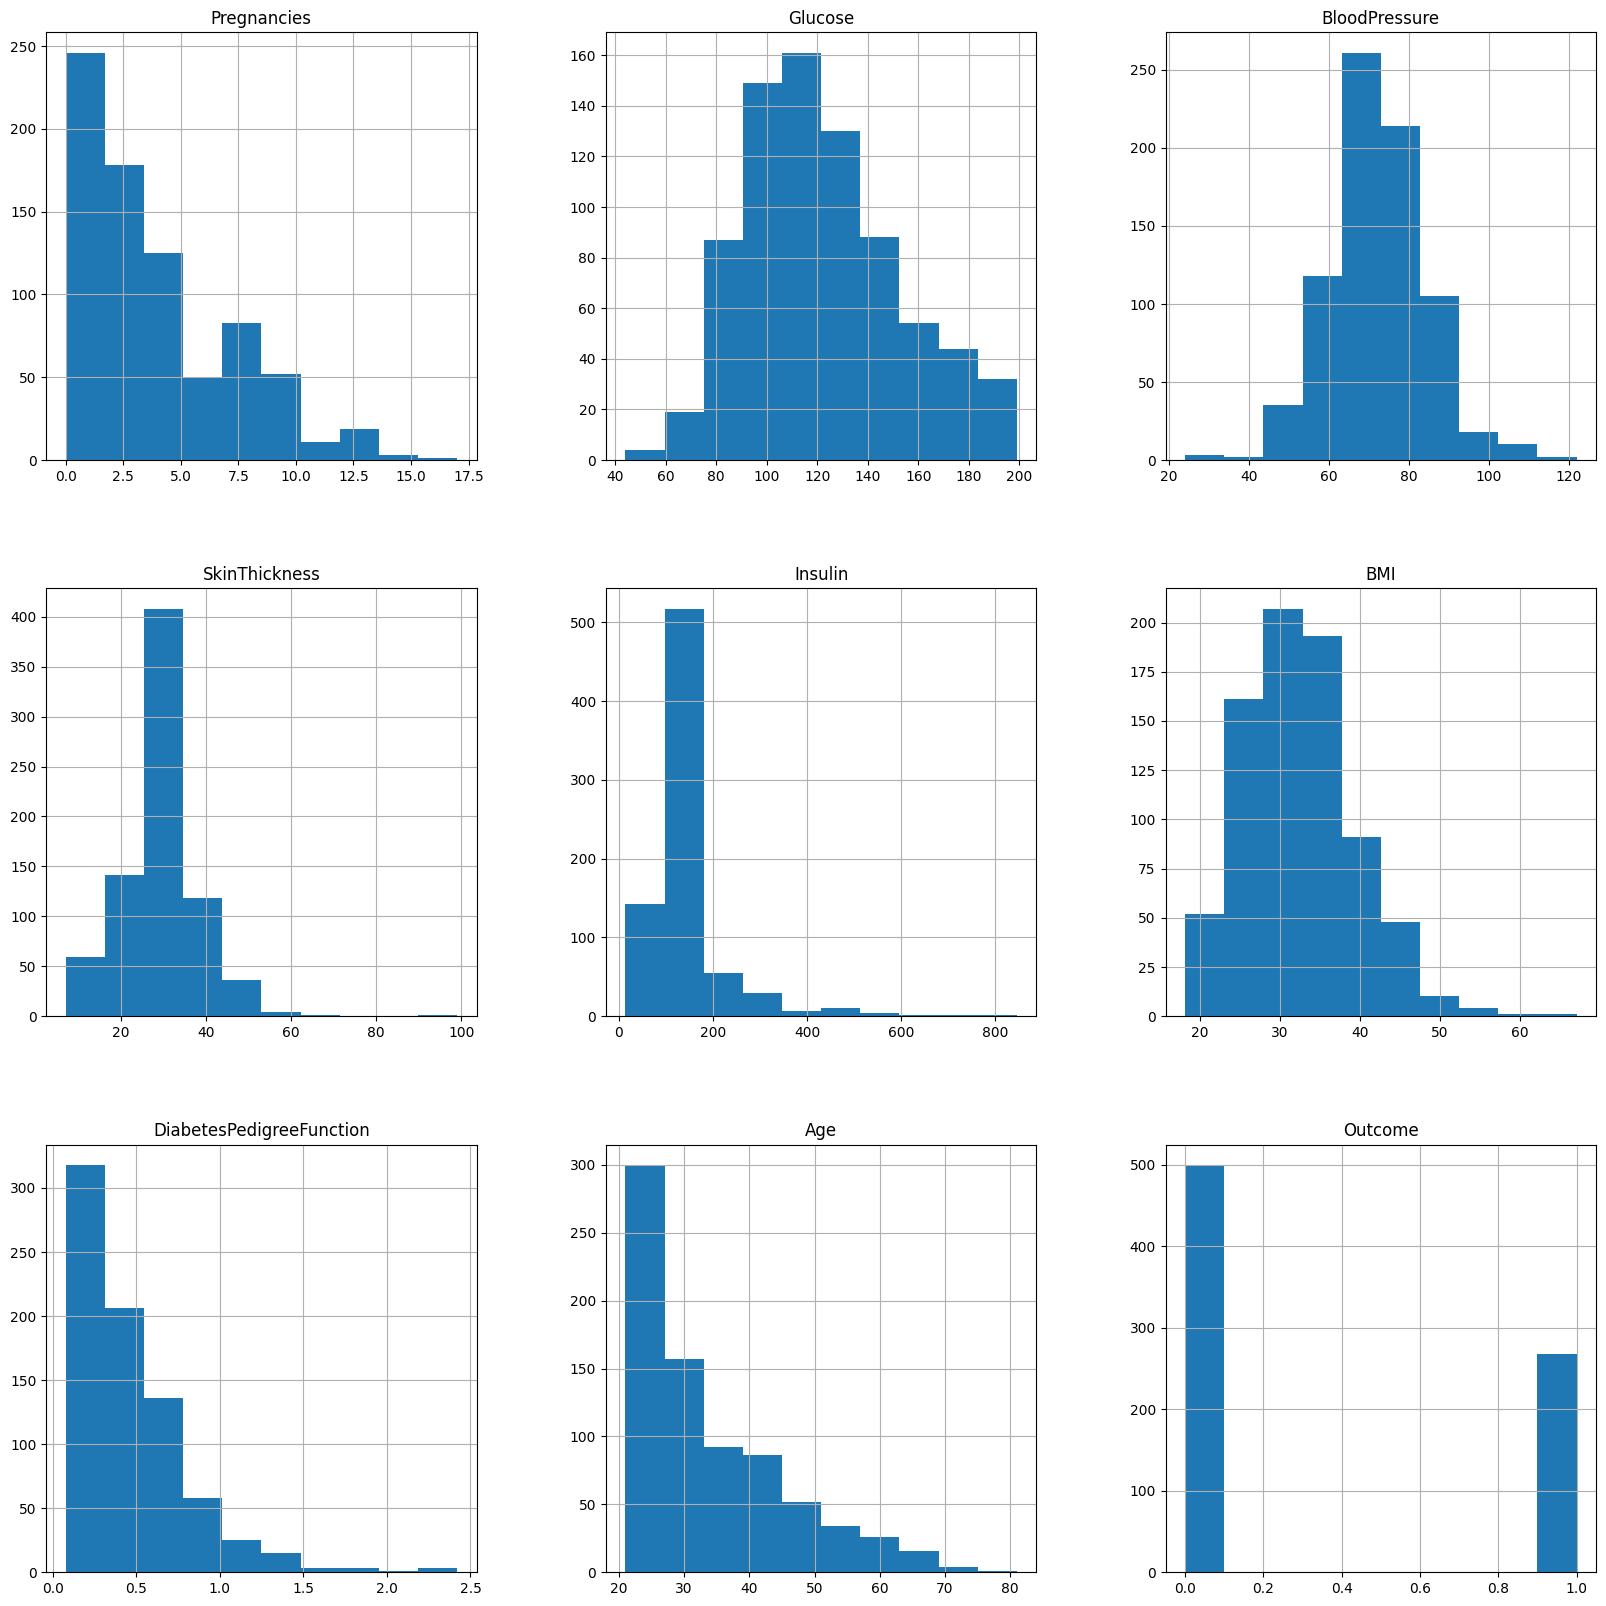

In [19]:
x = df1.hist(figsize = (20,20))

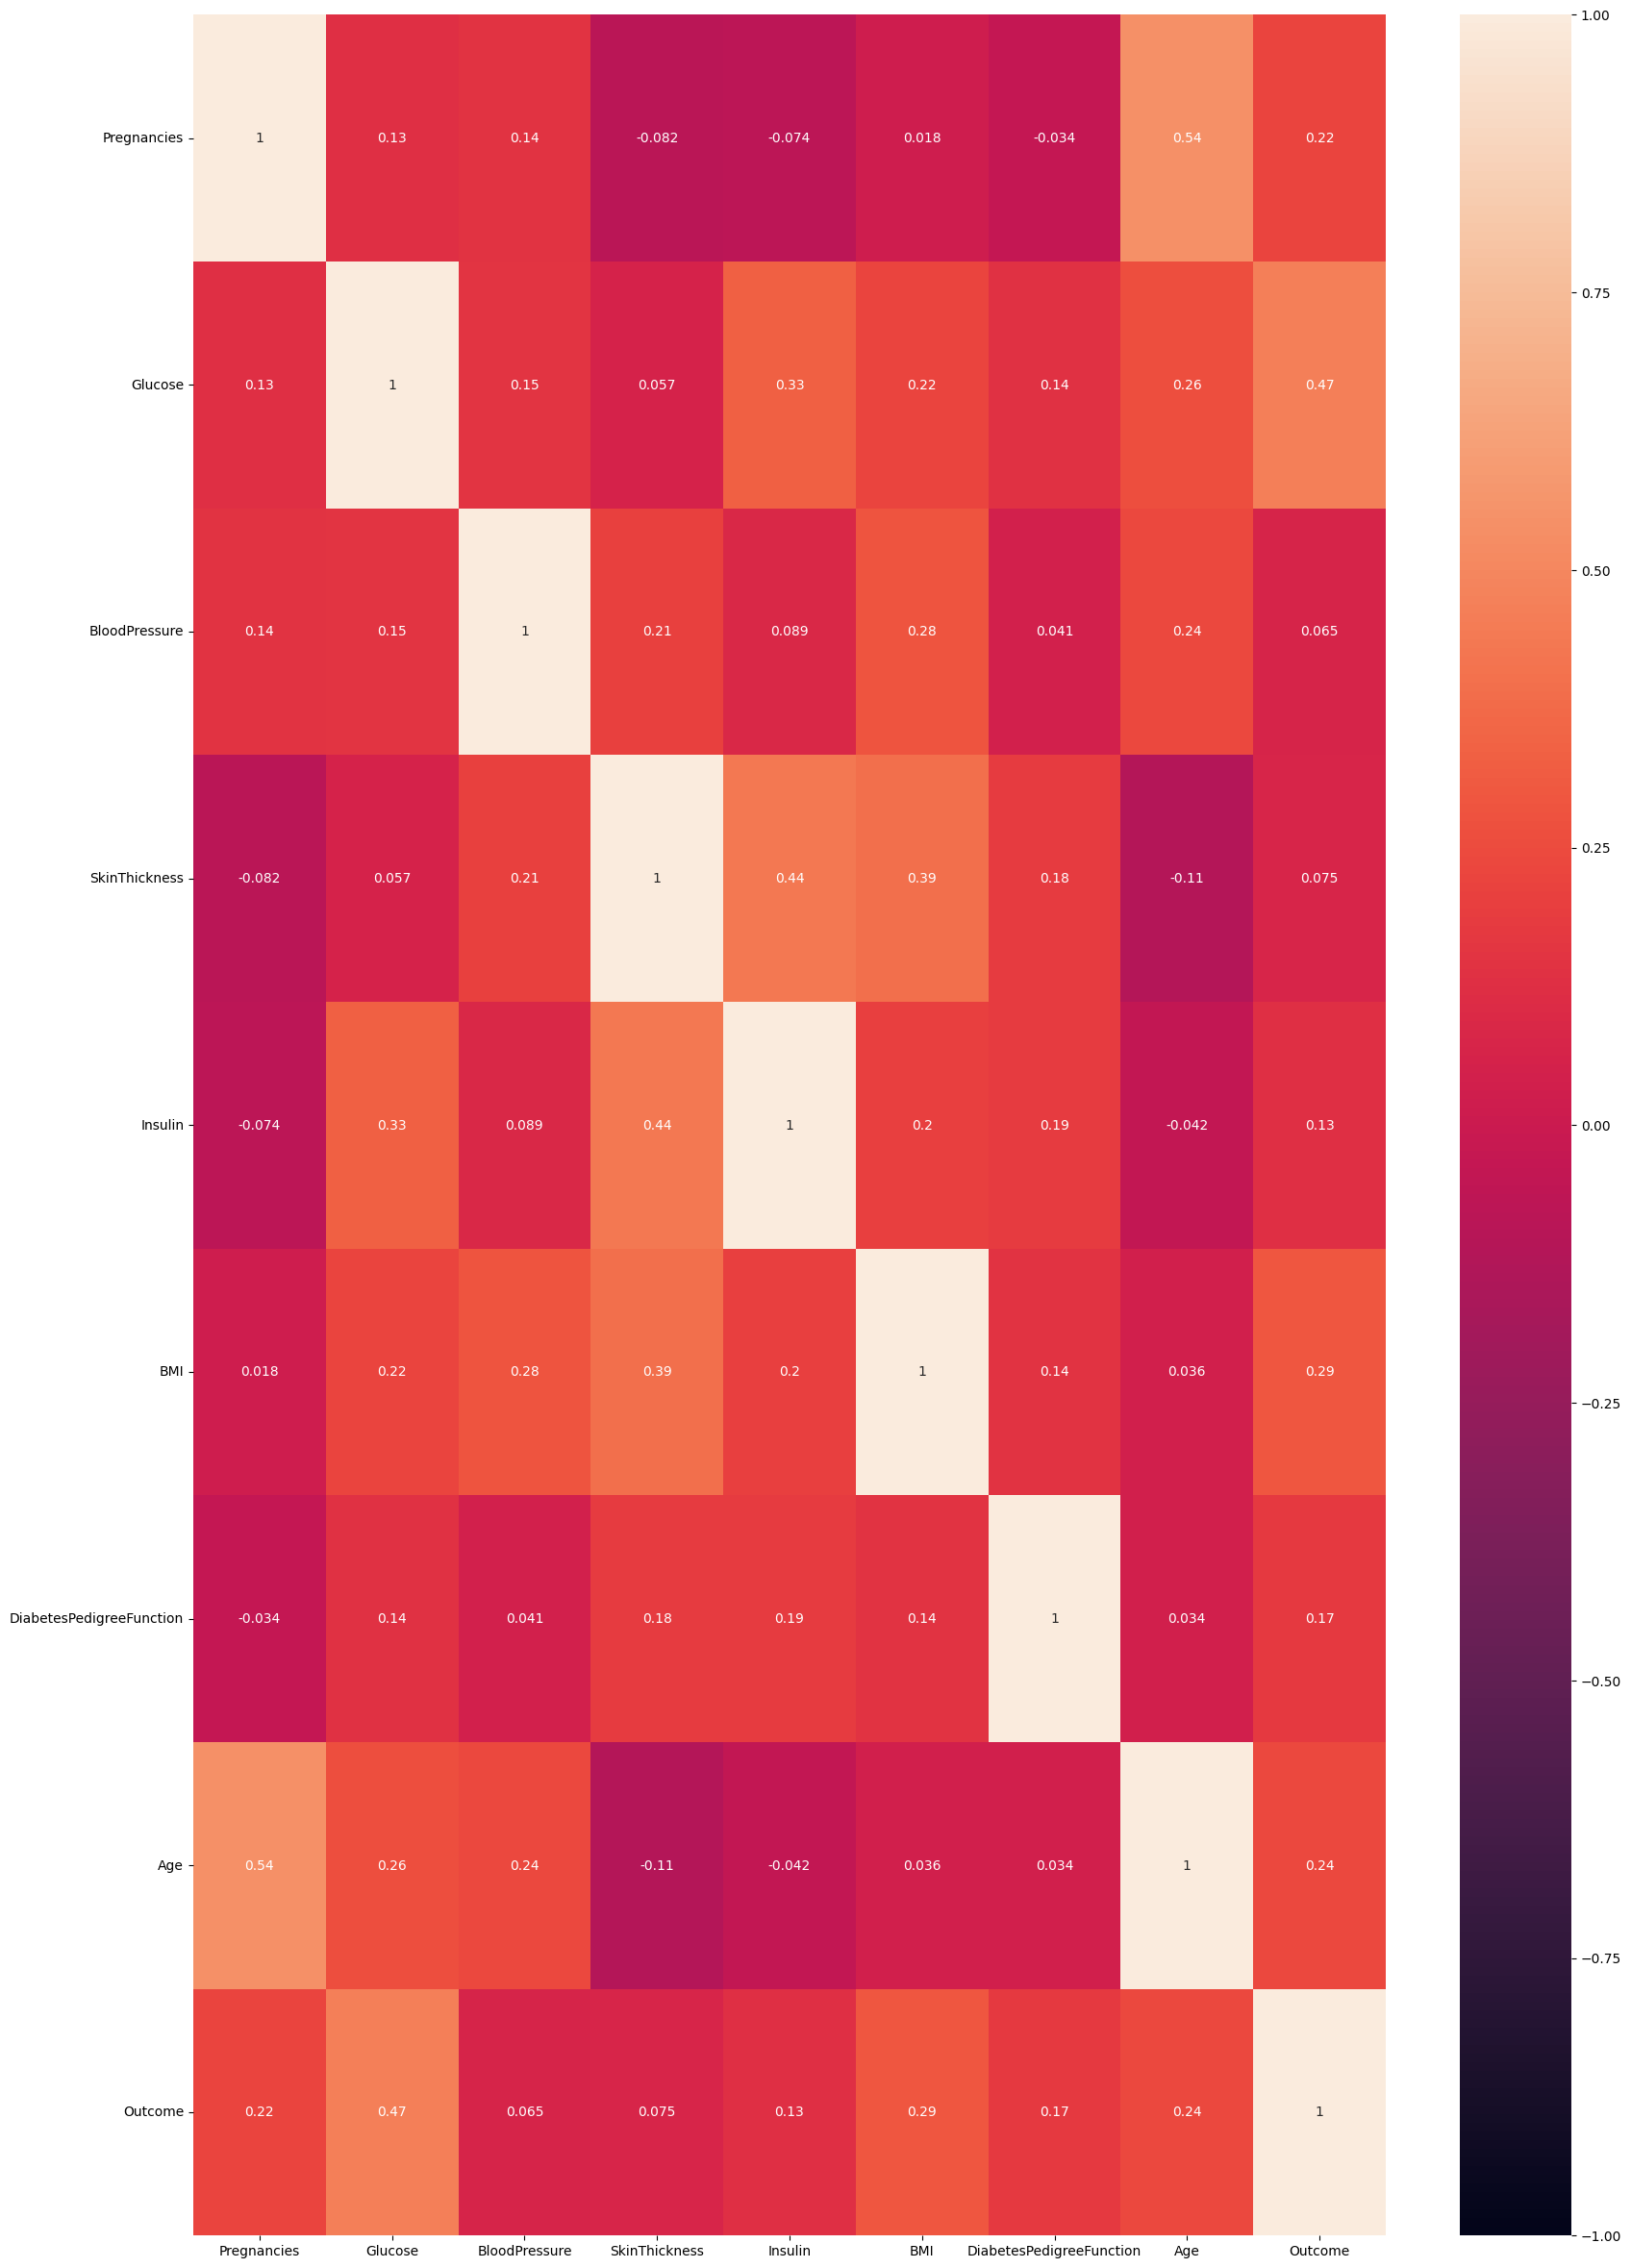

In [21]:
# Heatmap map for unclean data
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(20,30))
sns.heatmap(corr, vmin=-1.0,vmax=1.0,annot=True)
plt.yticks(rotation=0)
plt.show()

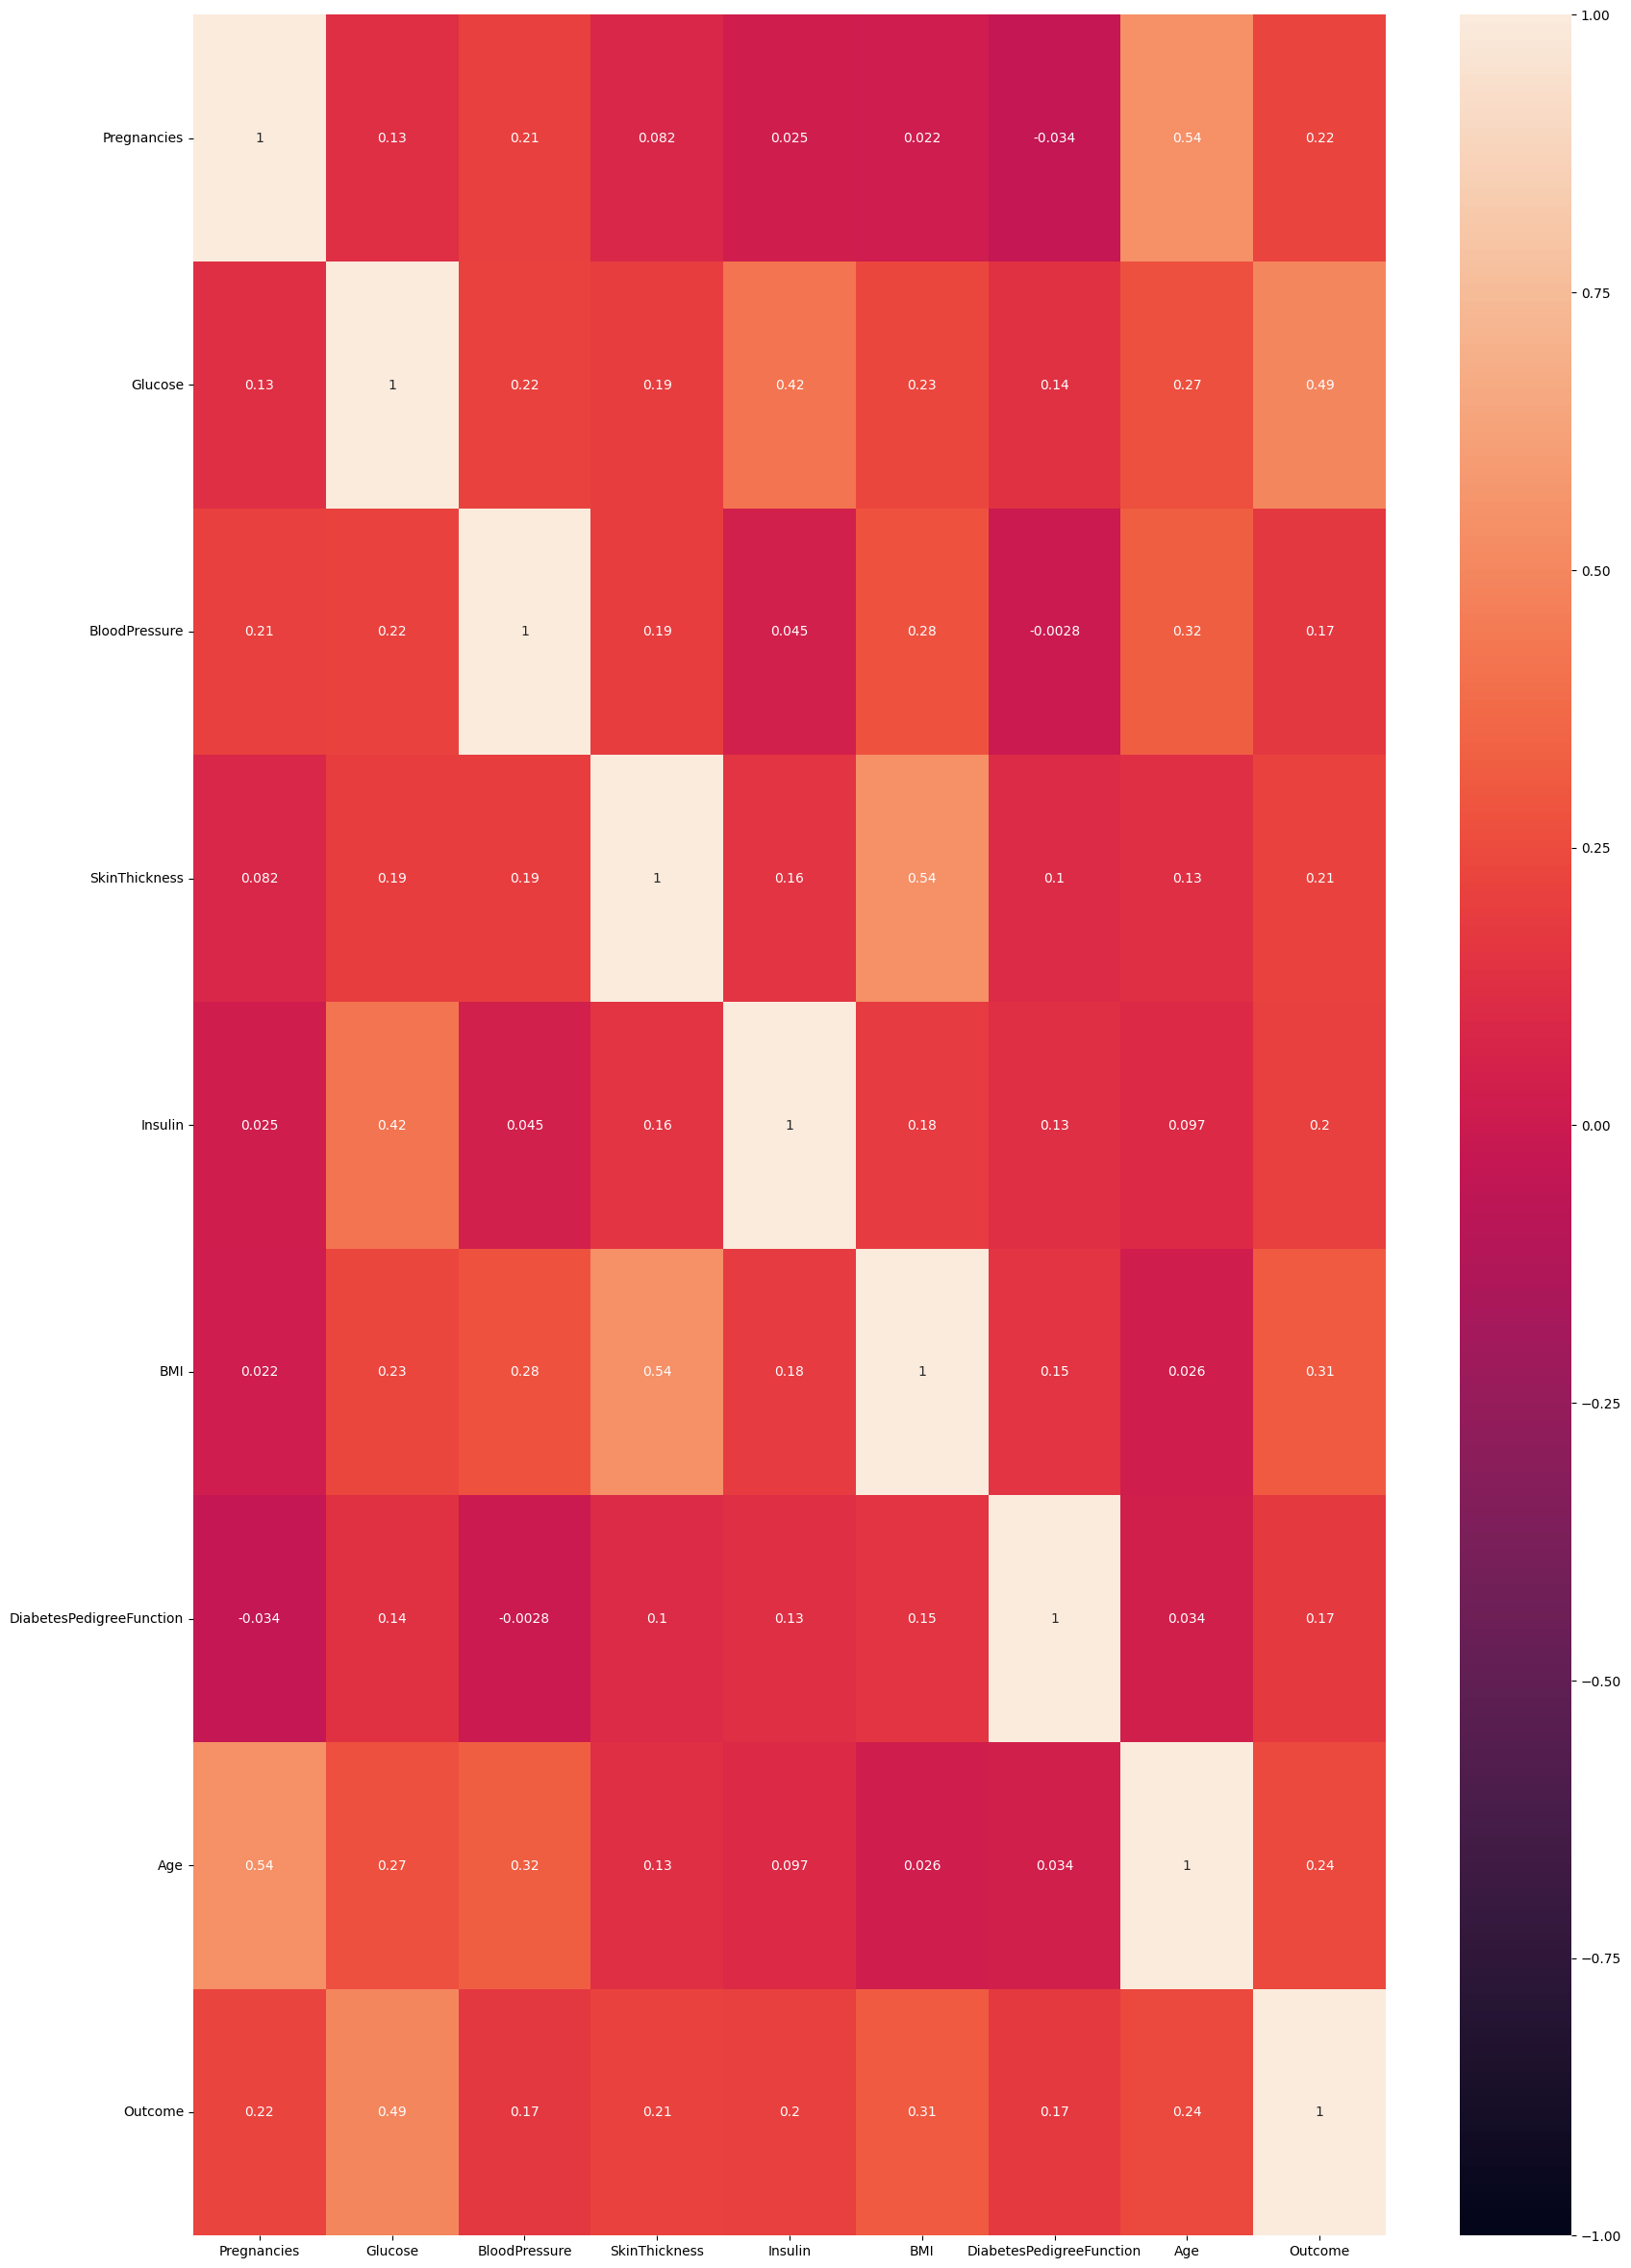

In [23]:
# Heatmap for clean data
import seaborn as sns
import matplotlib.pyplot as plt

corr = df1.corr()
plt.figure(figsize=(20,30))
sns.heatmap(corr, vmin=-1.0,vmax=1.0,annot=True)
plt.yticks(rotation=0)
plt.show()

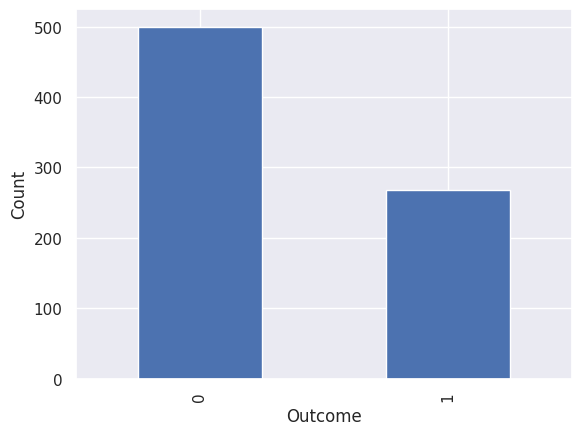

In [24]:
sns.set()
price_plot=df1['Outcome'].value_counts().plot(kind='bar')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

### From the above graph it is that the data is biased towards datapoints having the outcome value as 0 which  means that the non-diabetic patients were more in count as compared to that of the diabetic patients.

In [25]:
#Create X & Y
X = df1.values[:,0:-1]
Y = df1.values[:,-1]

In [26]:
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


As there are different feature variables in X, it can have a possibility of giving more importance to the variables having greater range and give less important to variables having small range which is not suitable.  
So to overcome this problem scaling is done on the all variables in X, as it will bring all the variables in a same range.  
This will help us to use distance metrics

In [27]:
# Scaling the X variables
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [28]:
# Train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [29]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


# Building base model with KNN

### 1. Euclidean distance metric

In [31]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='euclidean')
#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.

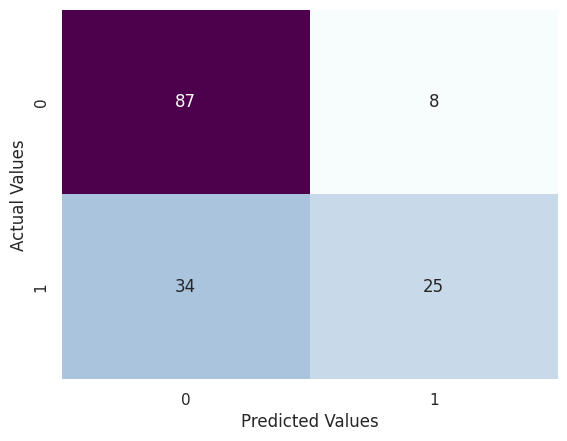

Classification report:
              precision    recall  f1-score   support

         0.0       0.72      0.92      0.81        95
         1.0       0.76      0.42      0.54        59

    accuracy                           0.73       154
   macro avg       0.74      0.67      0.67       154
weighted avg       0.73      0.73      0.71       154

Accuracy of the model:  0.7272727272727273


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
print("Classification report:")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

### 2. Manhattan Distance metric

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [36]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='manhattan')
#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)

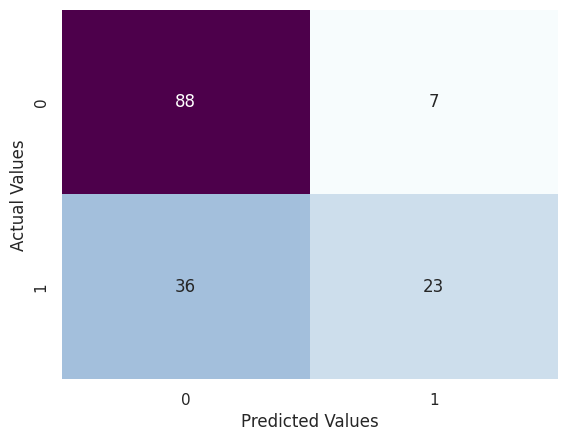

Classification report:
              precision    recall  f1-score   support

         0.0       0.71      0.93      0.80        95
         1.0       0.77      0.39      0.52        59

    accuracy                           0.72       154
   macro avg       0.74      0.66      0.66       154
weighted avg       0.73      0.72      0.69       154

Accuracy of the model:  0.7207792207792207


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
print("Classification report:")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

### 3. Minkowski distance metric

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [40]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='minkowski')
#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)

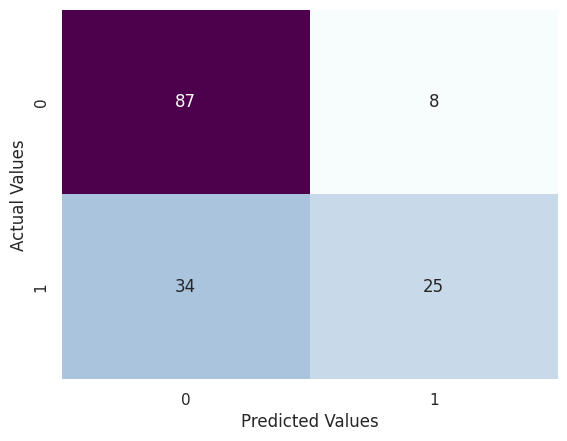

Classification report:
              precision    recall  f1-score   support

         0.0       0.72      0.92      0.81        95
         1.0       0.76      0.42      0.54        59

    accuracy                           0.73       154
   macro avg       0.74      0.67      0.67       154
weighted avg       0.73      0.73      0.71       154

Accuracy of the model:  0.7272727272727273


In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
print("Classification report:")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

#### All the distance metrics used for building the base model Euclidean & Manhattan showed less no. That's of Type II errors i.e.people who have diabetes are assumed as not have diabetes

# Hyper parameter tuning

In [42]:
from sklearn.metrics import accuracy_score
my_dict={}
for K in range(1,10):
    model_KNN=KNeighborsClassifier(n_neighbors=K,metric='euclidean')
    model_KNN.fit(X_train,Y_train)
    Y_pred=model_KNN.predict(X_test)
    print("Accuracy is",accuracy_score(Y_test,Y_pred), "for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test,Y_pred)

Accuracy is 0.7012987012987013 for K-Value: 1
Accuracy is 0.7207792207792207 for K-Value: 2
Accuracy is 0.7077922077922078 for K-Value: 3
Accuracy is 0.7272727272727273 for K-Value: 4
Accuracy is 0.7337662337662337 for K-Value: 5
Accuracy is 0.7207792207792207 for K-Value: 6
Accuracy is 0.7207792207792207 for K-Value: 7
Accuracy is 0.6883116883116883 for K-Value: 8
Accuracy is 0.7077922077922078 for K-Value: 9


In [43]:
for k in my_dict:
    if my_dict[k]==max(my_dict.values()):
        print(k,":",my_dict[k])

5 : 0.7337662337662337


In [45]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)

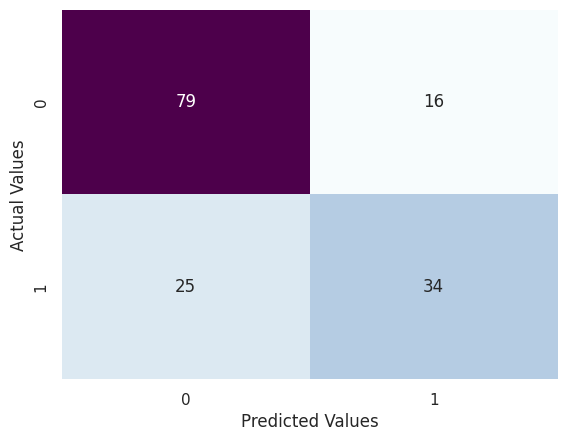

Classification report:
              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79        95
         1.0       0.68      0.58      0.62        59

    accuracy                           0.73       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154

Accuracy of the model:  0.7337662337662337


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
print("Classification report:")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

Certainly! Despite the presence of Type II errors, which represent diabetic patients being incorrectly classified as non-diabetic, the recall value indicates a bias toward detecting non-diabetic patients. This bias is reflected in the recall metric, which leans more towards classifying non-diabetic patients accurately, thus resulting in a higher recall score for that class.

# Opyimization techniques - Implementation of SMOTE

In [47]:
import imblearn

In [50]:
X=df1.values[:,:-1]
Y=df1.values[:,-1]

In [53]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
X=scaler.fit_transform(X)
print(X)

[[ 0.63994726  0.86510807 -0.03351824 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29912651 -0.47378505
  -0.87137393]]


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [56]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))

# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))

print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  209
Before OverSampling, counts of label '0':  405
After OverSampling, the shape of train_X:  (810, 8)
After OverSampling, the shape of train_y:  (810,)
After OverSampling, counts of label '1':  405
After OverSampling, counts of label '0':  405


In [58]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)

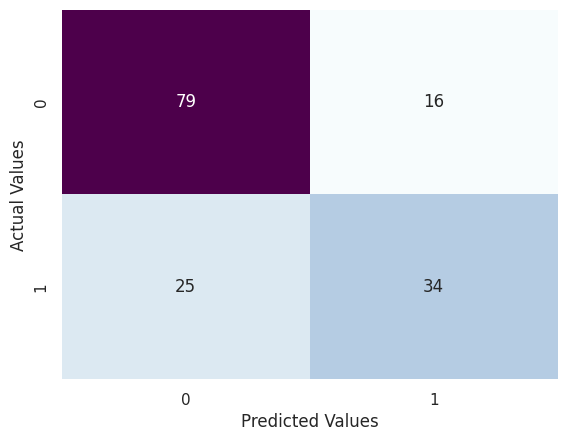

Classification report: 
              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79        95
         1.0       0.68      0.58      0.62        59

    accuracy                           0.73       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154

Accuracy of the model:  0.7337662337662337


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)